In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [39]:
ndx = pd.read_csv('../dataset/Assets/ndx.csv', encoding='unicode_escape')

In [40]:
def cleaned_asset(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '2000-01-01') & (df.index <= '2022-11-02')]
    return df

In [41]:
ndx = cleaned_asset(ndx)

In [42]:
def ndx_visualization(): 
    plt.plot(ndx, color= 'b')
    plt.title('NASDAQ 100', fontsize= 20)
    plt.xlabel('Year', fontsize= 20)
    plt.ylabel('Price', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

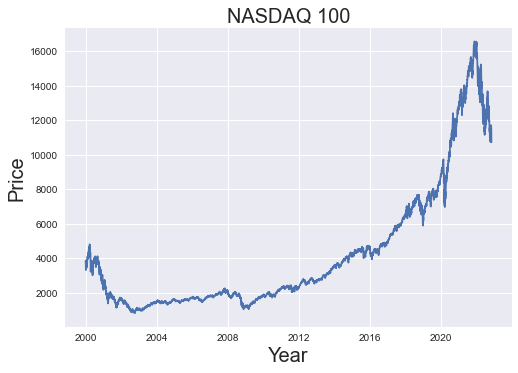

In [45]:
ndx_visualization()

In [44]:
spx = pd.read_csv('../dataset/Assets/spx.csv', encoding='unicode_escape')

In [46]:
spx = cleaned_asset(spx)

In [47]:
m2 = pd.read_csv ('../dataset/Indicators/monetary_supply.csv', encoding='unicode_escape')

def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '2000-01-01') & (df.index <= '2022-11-02')]
    return df

m2 = cleaned_indicator(m2)

In [107]:
def ndx_spx_m2():
    fig, ax1 = plt.subplots()
    #fig.set_facecolor("white")

    ax1.set_xlabel('Years', fontsize= 15)
    ax1.set_ylabel('Price', color='black', fontsize= 15)
    ax1.plot(spx.index, spx.close, color='black', label = 'SP 500', linewidth= 2, linestyle='solid')
    ax1.plot(ndx.index, ndx.close, color='b', label = 'NDX 100', linewidth=2, linestyle='solid')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(bbox_to_anchor=(1.1, 1.05), loc = 'upper left')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Monetary Supply (M2 in billions)', color="r", fontsize= 15)  # we already handled the x-label with ax1
    ax2.plot(m2.index, m2['close (in billions)'], color="r", label = 'M2', linewidth=2, linestyle='--')
    ax2.tick_params(axis='y', labelcolor="r")
    ax2.legend(bbox_to_anchor=(1.1, 0.96), loc = 'upper left')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("SP 500 vs NDX vs M2", fontsize= 15)
    plt.style.use('seaborn')   
    return plt.show()

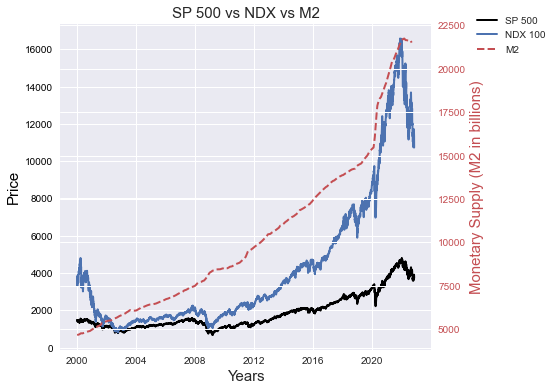

In [108]:
ndx_spx_m2()

In [105]:
def ndx_spx_m2_log():
    fig, ax1 = plt.subplots()
    #fig.set_facecolor("white")

    ax1.set_xlabel('Years', fontsize= 15)
    ax1.set_ylabel('Price', color='black', fontsize= 15)
    ax1.plot(spx.index, spx.close, color='black', label = 'SP 500', linewidth= 2, linestyle='solid')
    ax1.plot(ndx.index, ndx.close, color='b', label = 'NDX 100', linewidth=2, linestyle='solid')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(bbox_to_anchor=(1.1, 1.05), loc = 'upper left')
    plt.yscale('log')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Monetary Supply (M2 in billions)', color="r", fontsize= 15)  # we already handled the x-label with ax1
    ax2.plot(m2.index, m2['close (in billions)'], color="r", label = 'M2', linewidth=2, linestyle='--')
    ax2.tick_params(axis='y', labelcolor="r")
    ax2.legend(bbox_to_anchor=(1.1, 0.96), loc = 'upper left')
    plt.yscale('log')

    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("SP 500 vs NDX vs M2", fontsize= 15)
    plt.style.use('seaborn')   
    return plt.show()

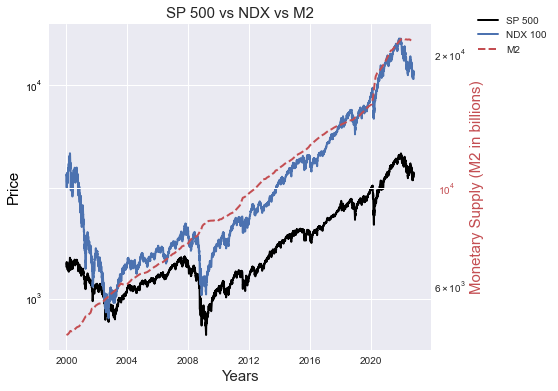

In [106]:
ndx_spx_m2_log()